In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [4]:
# load the data set
dataset = load_digits()

In [5]:
# main data
dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
# here we can see the shape of the data. there is total 1797 instances and 64 features, which is actually 8x8 image.
dataset.data.shape

(1797, 64)

In [7]:
# labels of the data
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
dataset.target.shape

(1797,)

In [10]:
X = dataset.data
y = dataset.target

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
# split the data in train and test datasets, 80% training data and 20% data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

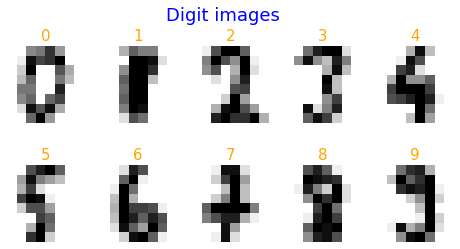

In [20]:
# plot the digit images
fig = plt.figure(figsize = (8, 4))
fig.suptitle('Digit images', fontsize = 18, color = 'blue')

for i in range(10):
    digit = X_train[y_train == i][0]
    plt.subplot(2, 5, i+1)
    plt.title(i, fontsize = 15, color = 'orange')
    plt.imshow(digit.reshape(8, 8), cmap = 'gray_r', interpolation = 'nearest')
    plt.axis(False)

In [35]:
# import some important modules
import pandas as pd
from IPython.display import display, Markdown
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.base import clone

In [78]:
def show_all_score(y_test, y_pred):
    display(Markdown('#### Accuracy score : '+str(accuracy_score(y_test, y_pred))))
    display(Markdown('#### Recall score : '+str(recall_score(y_test, y_pred, average = 'micro'))))
    display(Markdown('#### Precision score : '+str(precision_score(y_test, y_pred, average = 'micro'))))
    display(Markdown('#### F1 score : '+str(f1_score(y_test, y_pred, average = 'micro'))))

def show_all_graphs(y_test, y_pred):
    precision, recall, threshold = precision_recall_curve(y_test, y_pred)
    
    plt.figure(figsize = (8, 5))
    plt.title('Precision recall curve with threshold', fontsize = 18, color = 'orange')
    plt.plot(threshold, precision[:-1], label = 'Precision')
    plt.plot(threshold, recall[:-1], label = 'Recall')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Threshold', fontsize = 15, color = 'blue', rotation = 0)
    plt.ylabel('Score', fontsize = 15, color = 'green', rotation = 0)
    plt.show()
    
    plt.figure(figsize = (8, 5))
    plt.title('Precision recall curve', fontsize = 18, color = 'orange')
    plt.plot(recall, precision)
    plt.grid(True)
    plt.xlabel('Recall', fontsize = 15, color = 'blue')
    plt.ylabel('Precision', fontsize = 15, color = 'green')
    plt.show()
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    
    plt.figure(figsize = (8, 5))
    plt.title('ROC curve with threshold', fontsize = 18, color = 'orange')
    plt.plot(threshold, fpr, label = 'False positive rate')
    plt.plot(threshold, tpr, label = 'True positive rate')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Threshold', fontsize = 15, color = 'blue')
    plt.ylabel('Score', fontsize = 15, color = 'green')
    plt.show()

### SGD Classifier

In [36]:
from sklearn.linear_model import SGDClassifier

In [65]:
params = {'alpha': [0.01, 0.001, 0.0001], 'l1_ratio': [0.15, 0.25], 'tol': [0.01, 0.005, 0.001], 'max_iter': [600, 700, 1000]}

In [66]:
sgd_clf = SGDClassifier()

grid_model = GridSearchCV(sgd_clf, param_grid = params, cv = 5)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.001, 0.0001],
                         'l1_ratio': [0.15, 0.25], 'max_iter': [600, 700, 1000],
                         'tol': [0.01, 0.005, 0.001]},
             pre

In [67]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.15, 'max_iter': 600, 'tol': 0.01}

In [68]:
sgd_clf = SGDClassifier(**grid_model.best_params_)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=600, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
y_pred = sgd_clf.predict(X_test)
show_all_score(y_test, y_pred)

#### Accuracy score : 0.9583333333333334

#### Recall score : 0.9583333333333334

#### Precision score : 0.9583333333333334

#### F1 score : 0.9583333333333334

In [77]:
sgd_clf = SGDClassifier(**grid_model.best_params_)
y_pred = cross_val_predict(sgd_clf, X, y, cv = 3, method = 'decision_function')

In [79]:
show_all_graphs(y, y_pred)

ValueError: multiclass format is not supported